In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns 
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [7]:
df = pd.read_csv("..\data_preprocessing\processed_dataset.csv")
df.head()
print(df['sentiment'].value_counts())

sentiment
positive    307625
negative     48822
neutral      28070
Name: count, dtype: int64


In [14]:
print("Missing values in 'cleaned_review':", df['cleaned_review'].isnull().sum())
print("Missing values in 'sentiment':", df['sentiment'].isnull().sum())

Missing values in 'cleaned_review': 0
Missing values in 'sentiment': 0


In [15]:
df = df.dropna(subset=['cleaned_review', 'sentiment'])

In [17]:
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Bag of Words Model on CPU:")
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Train and evaluate model on BoW features
bow_model = MultinomialNB()
bow_model.fit(X_train_bow, y_train)
y_pred_bow = bow_model.predict(X_test_bow)

print("BoW Classification Report:")
print(classification_report(y_test, y_pred_bow))
print("BoW Accuracy:", accuracy_score(y_test, y_pred_bow))

Bag of Words Model on CPU:
BoW Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.63      0.64      9800
     neutral       0.31      0.27      0.29      5690
    positive       0.93      0.94      0.93     61376

    accuracy                           0.85     76866
   macro avg       0.63      0.62      0.62     76866
weighted avg       0.85      0.85      0.85     76866

BoW Accuracy: 0.8522493690318216


In [19]:
print("TF-IDF Model on CPU:")
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train and evaluate model on TF-IDF features
tfidf_model = MultinomialNB()
tfidf_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)

print("TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_tfidf))
print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))

TF-IDF Model on CPU:
TF-IDF Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.34      0.48      9800
     neutral       0.40      0.00      0.00      5690
    positive       0.84      1.00      0.91     61376

    accuracy                           0.84     76866
   macro avg       0.69      0.44      0.46     76866
weighted avg       0.81      0.84      0.79     76866

TF-IDF Accuracy: 0.8387973876616449


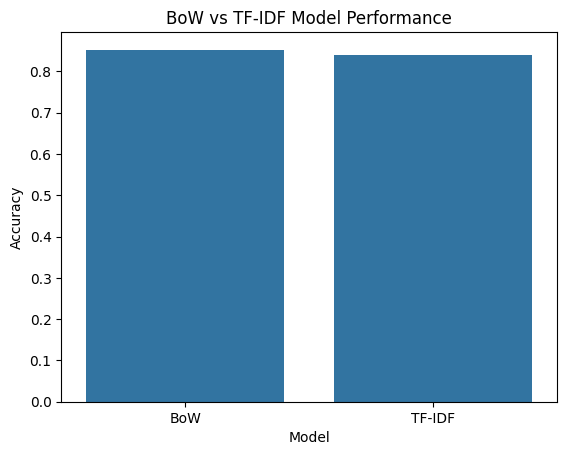

In [20]:
performance = pd.DataFrame({
    "Model": ["BoW", "TF-IDF"],
    "Accuracy": [accuracy_score(y_test, y_pred_bow), accuracy_score(y_test, y_pred_tfidf)]
})

sns.barplot(x="Model", y="Accuracy", data=performance)
plt.title("BoW vs TF-IDF Model Performance")
plt.show()